<a href="https://colab.research.google.com/github/Ignas12345/Project_in_Computational_Biology/blob/main/Edges_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This part is responsible for getting the edge map of the underfitted high resolution image for later use in regularization. This is taken from: https://github.com/Nikronic/EdgeNet**

In [5]:
!git clone https://github.com/Nikronic/EdgeNet.git
!git clone https://github.com/Ignas12345/Project_in_Computational_Biology.git

fatal: destination path 'EdgeNet' already exists and is not an empty directory.
Cloning into 'Project_in_Computational_Biology'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 100 (delta 10), reused 0 (delta 0), pack-reused 78
Receiving objects: 100% (100/100), 8.21 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [35]:
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2, ToTensor, ToPILImage
from Project_in_Computational_Biology.converters import turn_to_grayscale, image_to_tensor, tensor_to_image, generate_noise

from EdgeNet.EdgeNet import EdgeNet
from Project_in_Computational_Biology.plotting import plot

orig_img = Image.open('underfitted.jpg')

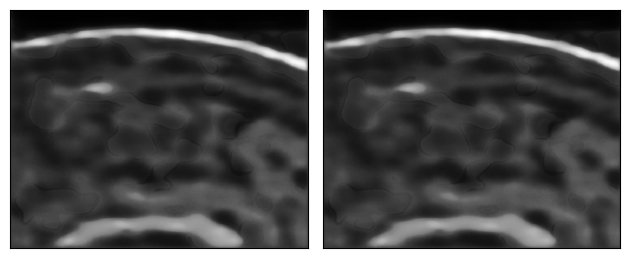

In [36]:
gray_img = turn_to_grayscale(orig_img)
plot([orig_img, gray_img], cmap='gray')

In [16]:
edgenet = EdgeNet(input_channels = 1)
#Here you can choose which parameters of EdgeNet You want to use. Each can give different results. It becomes like a sort of game at this point...
edgenet.load_state_dict(torch.load('Project_in_Computational_Biology/EdgeNet_Parameters/model_parameters_6'))

<All keys matched successfully>

In [37]:
output = edgenet(image_to_tensor(gray_img))

In [38]:
output_img = tensor_to_image(output)

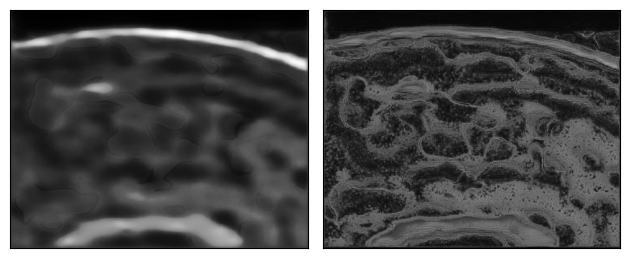

In [39]:
plot([gray_img, output_img], cmap = 'gray')
output_img.save('underfitted_edges.jpg')

Now take the underfitted edges image and move to the notebook "After Edges", where we try to use this image for regulariztaion.